In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
data = diabetes.data
n_features = data.shape[1]

In [ ]:
# sklearn Kernel-PCA
MSE = []
for i in range(1, n_features+1):
  kpca = KernelPCA(n_components=i, kernel='rbf', fit_inverse_transform = True)
  X_trans = kpca.fit_transform(data)
  X_reconst = kpca.inverse_transform(X_trans)
  diff = X_reconst - data
  d = np.sum(np.column_stack([np.linalg.norm(diff[i]) for i in range(10)]))
  MSE.append(d)
MSE

[1.1407859834276486,
 1.137142495322764,
 1.1703974512061248,
 1.1854829623359986,
 1.2106414733413475,
 1.228121838372429,
 1.242378455902819,
 1.253847471185893,
 1.264943343434125,
 1.2740945751652493]

Text(0, 0.5, 'Eigenvalues')

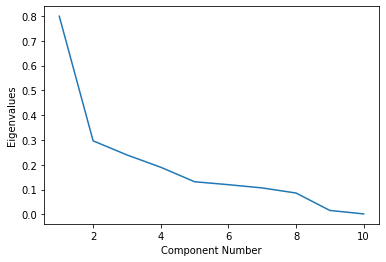

In [ ]:
plt.figure(1)
x = np.arange(1,11)
plt.plot(x, kpca.eigenvalues_)
plt.xlabel('Component Number')
plt.ylabel('Eigenvalues')

In [ ]:
# Build Kernel-PCA from scratch
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh

In [ ]:
sq_dists = pdist(data, 'sqeuclidean')
mat_sq_dists = squareform(sq_dists)
K = exp(-mat_sq_dists / (2 * 0.4 **2))
N = K.shape[0]
C_n = np.identity(N) - np.ones((N,N)) / N
X_tilda = data.T.dot(C_n)
S_x = C_n.T.dot(K).dot(C_n) / N
eigvals, eigvecs = eigh(S_x)
eigvals, eigvecs = eigvals[::-1], eigvecs[::-1]

# collect the top k eigenvectors(projected examples)
X_pc = np.column_stack([eigvecs[:, i] for i in range(5)])
X_pc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.04756515,  0.00032944,  0.00208207,  0.00179827,  0.0021967 ],
       [-0.04756517, -0.0068837 ,  0.01160707,  0.00790349, -0.00494672],
       [-0.04756519,  0.19908729, -0.04009755, -0.00845489, -0.00123948],
       ...,
       [-0.04756513,  0.01021314, -0.00366576,  0.02461514,  0.00490866],
       [-0.04756519, -0.01824905, -0.03536261, -0.03532044, -0.01454688],
       [-0.04756514, -0.01107048, -0.00268349, -0.00431442,  0.01657743]])

In [ ]:
def rbk_kernel_pca(X, gamma, n_components):
  """
  Parameters
  -------------------
  X: {Numpy ndarray} shape = [n_examples, n_features]
  gamma: float Tuning parameters of the RBF kernel
  n_components: int Number of principal components to return

  return
  -------------------
  X_pc: {Numpy ndarray}, shape = [n_examples, k_features]
      Projected dataset
  """
  ## calculate rbk kernel
  # calculate pairwise squared Euclidean
  sq_dists = pdist(X, 'sqeuclidean')
  # convert pairwise distances into a square matrix
  mat_sq_dists = squareform(sq_dists)
  # compute the symmetric kernel matrix
  K = exp(- mat_sq_dists / (2 * gamma **2))
  # center the kernel matrix
  N = K.shape[0]
  C_n = np.identity(N) - np.ones((N,N)) / N
  S_x = C_n.T.dot(K).dot(C_n) / N

  eigvals, eigvecs = eigh(S_x)
  eigvals, eigvecs = eigvals[::-1], eigvecs[::-1]

  # collect the top k eigenvectors(projected examples)
  X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])


In [ ]:
X_pc = rbk_kernel_pca(data, 0.4, 5)
X_pc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
